**Import Library**

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Download and prepare the CIFAR-10 dataset**

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

**Feature Extraction - Convolutional Base**

In [4]:
train_images[100].shape

(32, 32, 3)

In [74]:
model = models.Sequential()
model.add(layers.Conv2D( 32, (3,3), activation='relu', input_shape=(32,32,3) ) )
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Conv2D( 32, (3,3), activation='relu' ) )
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Conv2D( 32, (3,3), activation='relu' ) )
model.add(layers.Dropout(0.1))

In [75]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 dropout_10 (Dropout)        (None, 4, 4, 32)        

**Flatten & Fully Connected Layer**

In [76]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation= 'relu'))
model.add(layers.Dense(256))

In [77]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 dropout_10 (Dropout)        (None, 4, 4, 32)        

**Compile and train the model**

In [78]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=100, validation_data=(test_images, test_labels))

Epoch 1/10
500/500 [==============================] - 19s 38ms/step - loss: 1.8515 - accuracy: 0.3338 - val_loss: 1.4745 - val_accuracy: 0.4615
Epoch 2/10
500/500 [==============================] - 19s 38ms/step - loss: 1.4157 - accuracy: 0.4859 - val_loss: 1.3134 - val_accuracy: 0.5256
Epoch 3/10
500/500 [==============================] - 19s 39ms/step - loss: 1.2820 - accuracy: 0.5414 - val_loss: 1.2303 - val_accuracy: 0.5547
Epoch 4/10
500/500 [==============================] - 18s 36ms/step - loss: 1.1983 - accuracy: 0.5738 - val_loss: 1.1688 - val_accuracy: 0.5805
Epoch 5/10
500/500 [==============================] - 17s 35ms/step - loss: 1.1147 - accuracy: 0.6033 - val_loss: 1.1129 - val_accuracy: 0.6048
Epoch 6/10
500/500 [==============================] - 19s 38ms/step - loss: 1.0523 - accuracy: 0.6287 - val_loss: 1.0188 - val_accuracy: 0.6414
Epoch 7/10
500/500 [==============================] - 19s 37ms/step - loss: 0.9947 - accuracy: 0.6495 - val_loss: 1.0181 - val_accuracy:

**Evaluate the model**

In [80]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.9106 - accuracy: 0.6818


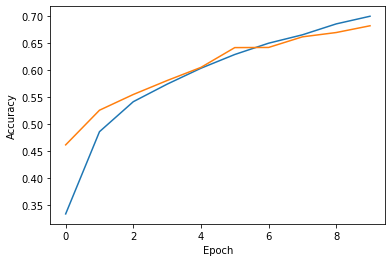

In [81]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()




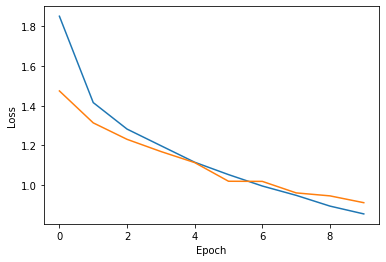

In [82]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


